# Interactive Visualization with Plotly

For this lab, you'll need to install Plotly. Make sure to follow *both* the [plotly](https://plotly.com/python/getting-started/#installation) steps and the [jupyter support](https://plotly.com/python/getting-started/#jupyterlab-support) steps.

[Plotly](https://plotly.com/python/) is an interactive visualization package which is as part of the [Plotly and Dash](https://plot.ly) enterprise. Here we'll showcase just a few graphs to get you acquainted with their [Plotly Express](https://plotly.com/python/plotly-express/) module. We'll use [data from the titanic disaster](https://www.kaggle.com/competitions/titanic/data).

In [1]:
import plotly.express as px
import pandas as pd

In [2]:
pip install plotly==5.19.0

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install "jupyterlab>=3" "ipywidgets>=7.6"

  Using cached jupyterlab-4.1.2-py3-none-any.whl.metadata (15 kB)
  Using cached ipywidgets-8.1.2-py3-none-any.whl.metadata (2.4 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached httpx-0.27.0-py3-none-any.whl.metadata (7.2 kB)
  Using cached jupyter_lsp-2.2.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.12.5-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.25.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached widgetsnbextension-4.0.10-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.10-py3-none-any.whl.metadata (4.1 kB)
  Using cached anyio-4.3.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached httpcore-1.0.4-py3-none-any.whl.metadata (20 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/11

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [4]:
pip install jupyter-dash


  Using cached jupyter_dash-0.4.2-py3-none-any.whl.metadata (3.6 kB)
Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)


In [5]:
df = pd.read_csv('C:\\Users\\SHREYA\\OneDrive\\Documents\\Gitstuff\\titanic.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Scatter Plots

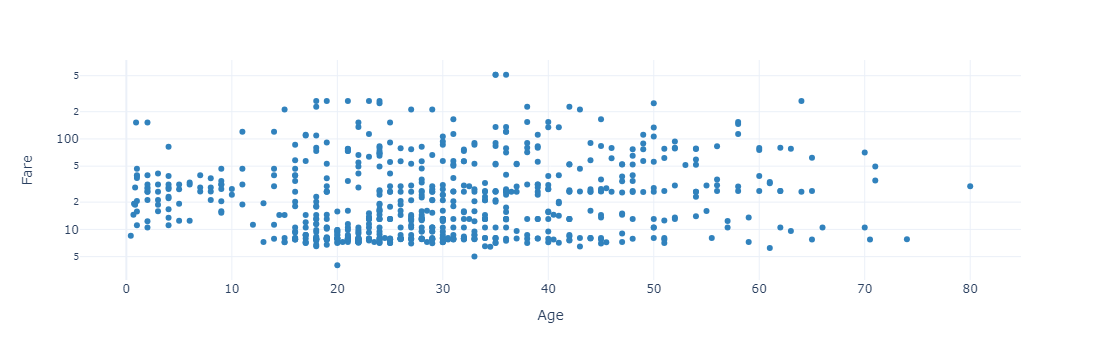

In [11]:
fig = px.scatter(data_frame=df,
                 x='Age',
                 y='Fare',
                 hover_data=['Name', 'Sex'],
                 template='plotly_white',
                 color_discrete_sequence=['#3182bd'],
                 log_y=True)
fig.show()

## Bar Charts

We can create some [interesting bar chart variations](https://plot.ly/python/bar-charts/):

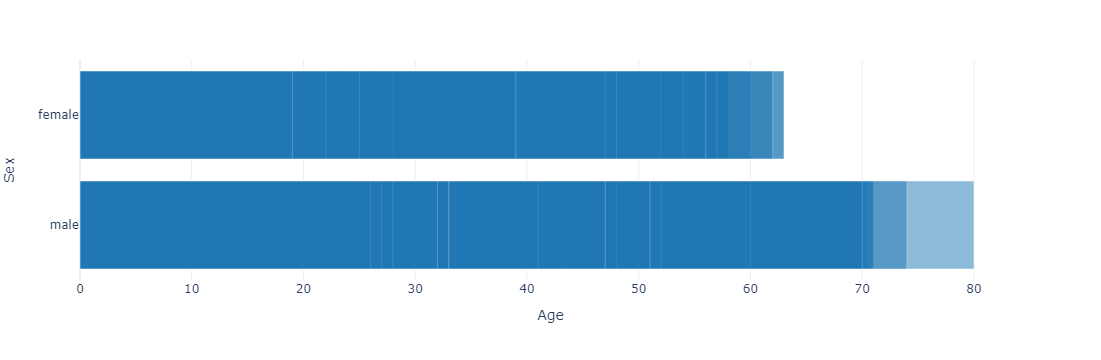

In [10]:
fig = px.bar(df, 
             x='Age', 
             y='Sex',
             barmode='overlay',
             hover_data=['Name'],
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.D3
            )
fig.show()

## Histograms

In [12]:
df['Survived'].dtype

dtype('int64')

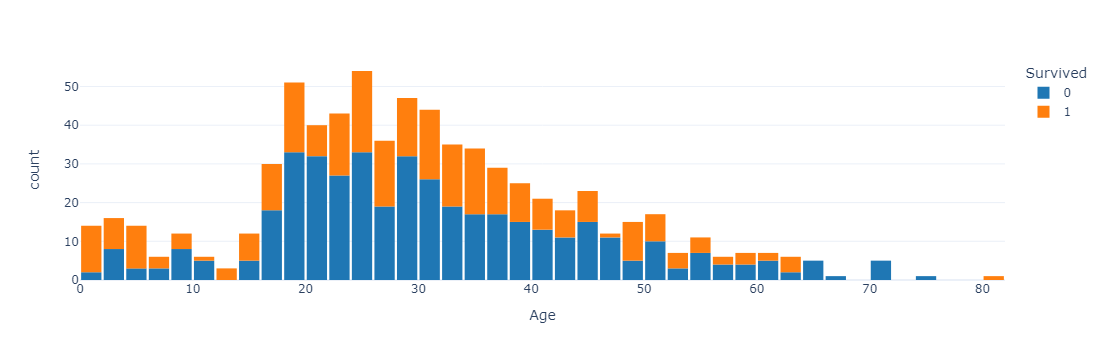

In [13]:
fig = px.histogram(df, 
                   x='Age', 
                   color='Survived',
                   template='plotly_white',
                   color_discrete_sequence=px.colors.qualitative.D3
                  )

fig.update_layout(
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig.show()

## Bubble Plot

For this plot, we'll transform the data a bit to investigate the survival rates across different age decades.

In [14]:
# calculate decade
df['Age_rounded'] = df['Age'].round(-1)
df[['Age', 'Age_rounded']].head()

,Age,Age_rounded
0,22.0,20.0
1,38.0,40.0
2,26.0,30.0
3,35.0,40.0
4,35.0,40.0


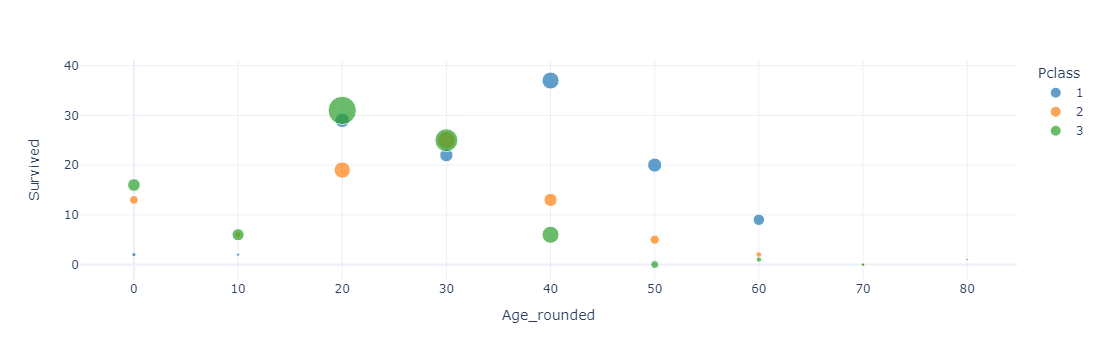

In [15]:
df_plot = df.groupby(['Pclass', 'Age_rounded'])['Survived'] \
            .agg([('Survived', 'sum'), 
                  ('Passengers', 'count')]).reset_index()

df_plot["Pclass"] = df_plot["Pclass"].astype(str)

fig = px.scatter(data_frame=df_plot,
                 x='Age_rounded',
                 y='Survived',
                 size='Passengers',
                 color='Pclass',
                 color_discrete_sequence=px.colors.qualitative.D3,
                 template='plotly_white')
fig.show()

## Limitations ...

What if we want to be able to "animate" the age decade of the passengers? [Be careful](https://plotly.com/python/animations/#:~:text=Animations%20are%20designed%20to%20work%20well%20when%20each%20row%20of%20input%20is%20present%20across%20all%20animation%20frames%2C%20and%20when%20categorical%20values%20mapped%20to%20symbol%2C%20color%20and%20facet%20are%20constant%20across%20frames.%20Animations%20may%20be%20misleading%20or%20inconsistent%20if%20these%20constraints%20are%20not%20met.).

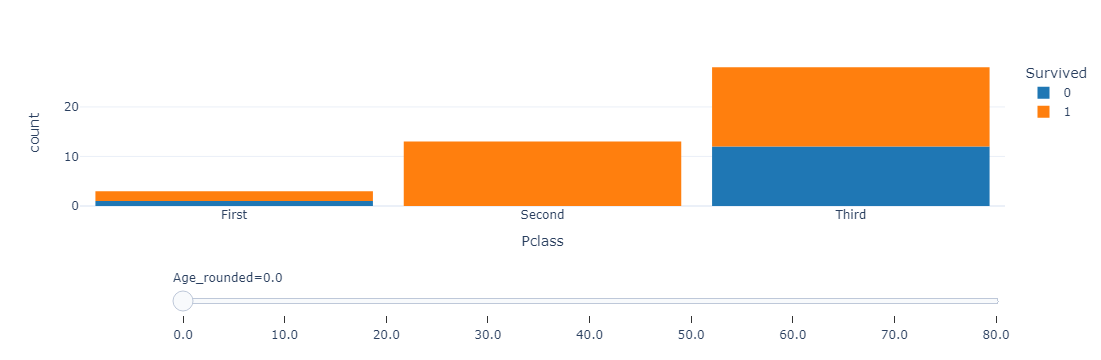

In [16]:
fig = px.histogram(df.sort_values('Age_rounded'), 
                   x='Pclass',
                   color='Survived',
                   template='plotly_white',
                   animation_frame="Age_rounded",  # this is the value to "animate"
                   # animation_group="PassengerId",  # uncomment this ...
                   color_discrete_sequence=px.colors.qualitative.D3)

fig.update_layout(
    xaxis_tickmode = 'array',
    xaxis_tickvals = [1, 2, 3],
    xaxis_ticktext = ['First', 'Second', 'Third'],
    bargap=0.1, # gap between bars of adjacent location coordinates
)

fig["layout"].pop("updatemenus") # drop animation buttons
fig.show()

**(In class, if there's time) Can we improve on this?**

In [17]:
# fig = px.histogram(df.sort_values('Age_rounded'), 
#                    x='Pclass',
#                    facet_row='Survived',
#                    color='Age_rounded',
#                    template='plotly_white',
#                    color_discrete_sequence=px.colors.sequential.Blues)

# fig.update_layout(
#     xaxis_tickmode = 'array',
#     xaxis_tickvals = [1, 2, 3],
#     xaxis_ticktext = ['First', 'Second', 'Third'],
#     bargap=0.1, # gap between bars of adjacent location coordinates
# )

# fig["layout"].pop("updatemenus") # drop animation buttons
# fig.show()

# EXERCISES

## Exercise 1

Take a look at the `Cabin` column of the data, and investigate how it relates to at least one other column. Consider the context of the Titanic ship wreck. Try to formulate a question around this column, and visualize it using Plotly. **Build at least 2 different plots** of the same data.

Feel free to use the [gallery](https://plotly.com/python/) as a resource.

#### Did passengers in certain cabin sections have higher survival rates? For example, were passengers in cabins closer to the lifeboats more likely to survive?"

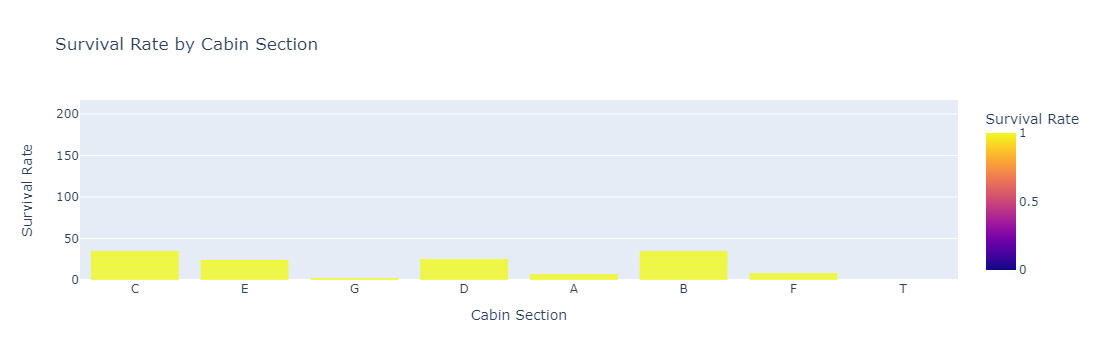

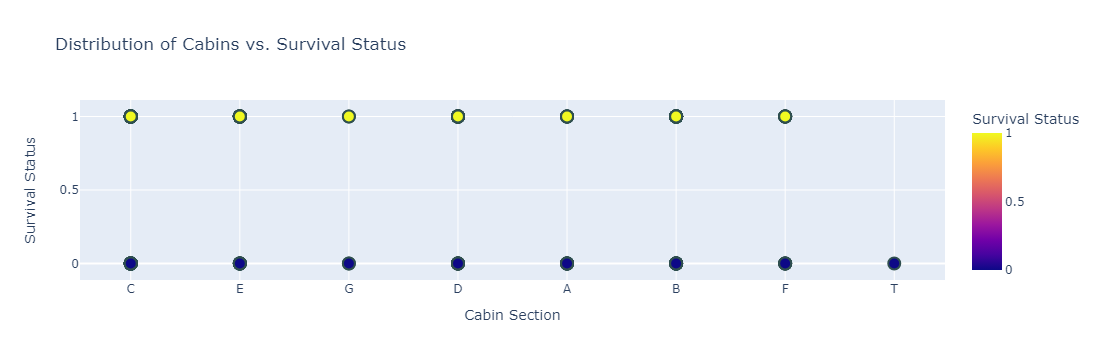

In [21]:
import pandas as pd
import plotly.express as px

data = pd.DataFrame(df)
data['CabinSection'] = data['Cabin'].str[0]

fig = px.bar(data, x='CabinSection', y='Survived', color='Survived', 
             title='Survival Rate by Cabin Section', labels={'CabinSection': 'Cabin Section', 'Survived': 'Survival Rate'})
fig.update_traces(marker_line_width=0)
fig.show()

fig = px.scatter(data, x='CabinSection', y='Survived', color='Survived', 
                 title='Distribution of Cabins vs. Survival Status', labels={'CabinSection': 'Cabin Section', 'Survived': 'Survival Status'})
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))
fig.show()



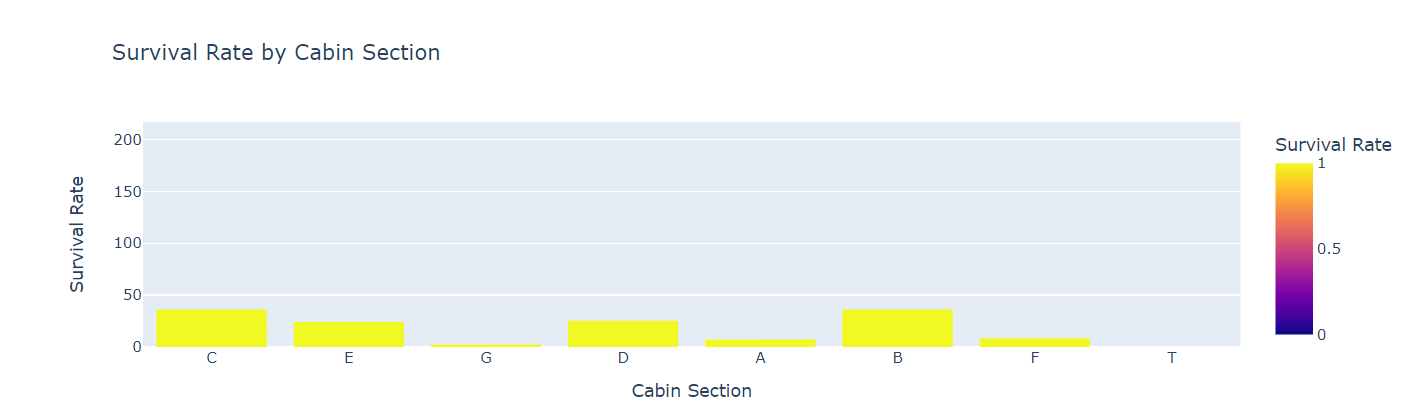


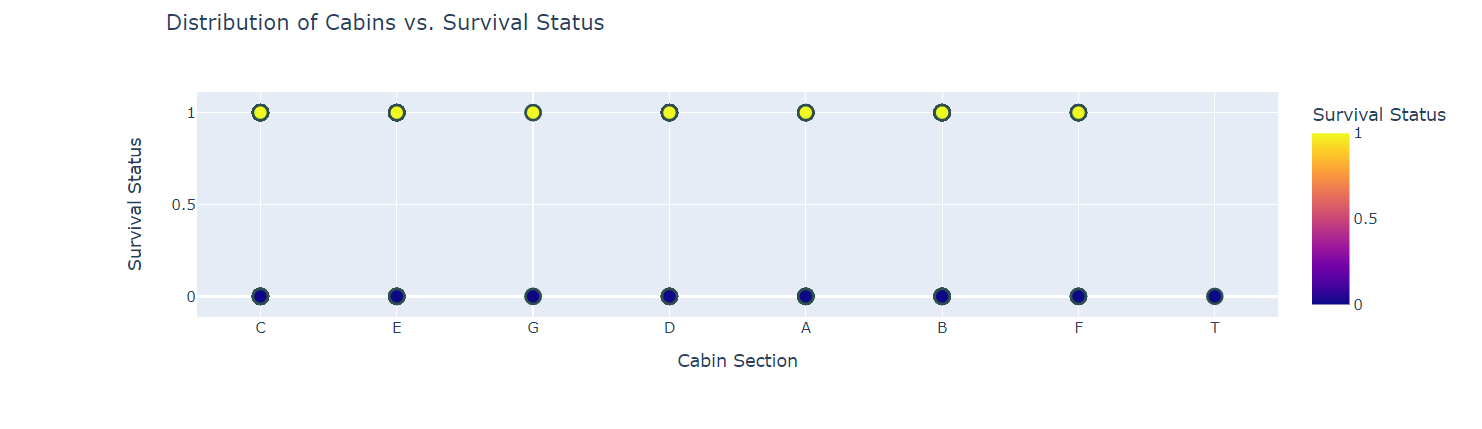

## Exercise 2

Consider the Bubble Plot, above. Try to figure out what it might be trying to communicate.

1. Point out at least three issues with this visualization.
2. Build at least two visualizations in Plotly that communicate a similar message, but which do it far better.

 #### Three issues with this visualization

1. Too Many Overlapping Points: There are so many bubbles on the plot that they overlap, especially in busy areas with lots of passengers. This makes it hard to see individual points clearly.

2. Labels Are Messy: The labels for the passenger class categories are all jumbled up and hard to read, especially on the right side of the plot.

3. Hard to See Overall Patterns: While the plot shows how survival rates vary by age and passenger class, it's not great for seeing the big picture or trends across the whole dat rates vary.

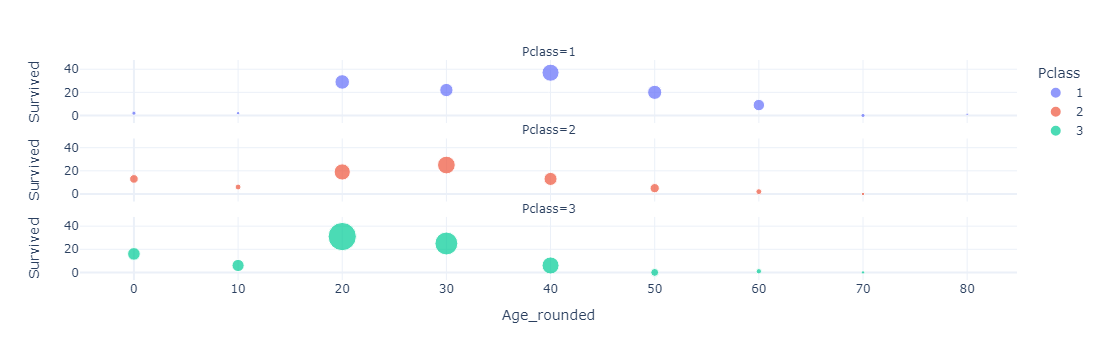

In [26]:
import plotly.express as px

fig = px.scatter(data_frame=df_plot,
                 x='Age_rounded',
                 y='Survived',
                 size='Passengers',
                 color='Pclass',
                 facet_col='Pclass',
                 facet_col_wrap=1,
                 template='plotly_white')
fig.show()


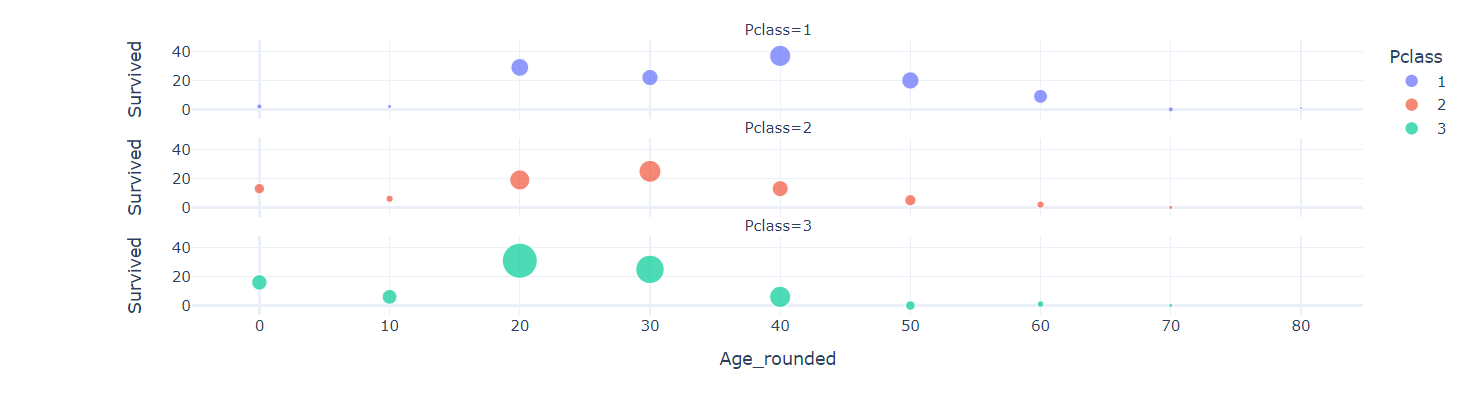

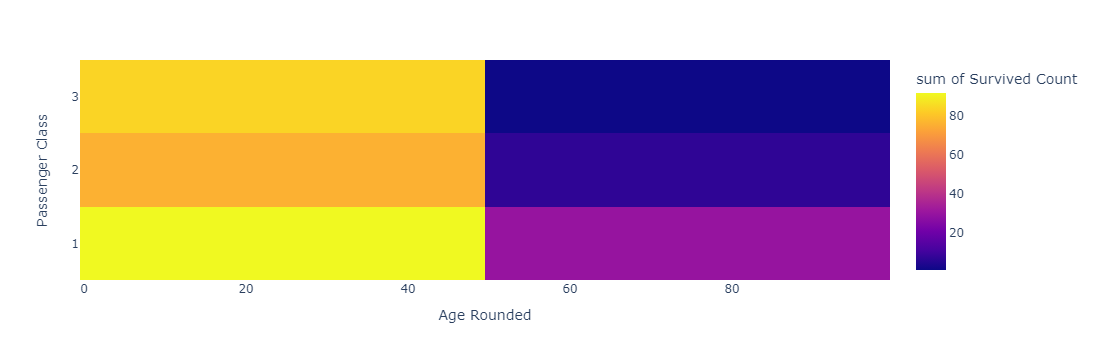

In [27]:
import plotly.express as px

fig = px.density_heatmap(data_frame=df_plot,
                          x='Age_rounded',
                          y='Pclass',
                          z='Survived',
                          histfunc='sum',
                          labels={'Age_rounded': 'Age Rounded', 'Pclass': 'Passenger Class', 'Survived': 'Survived Count'},
                          template='plotly_white')
fig.show()


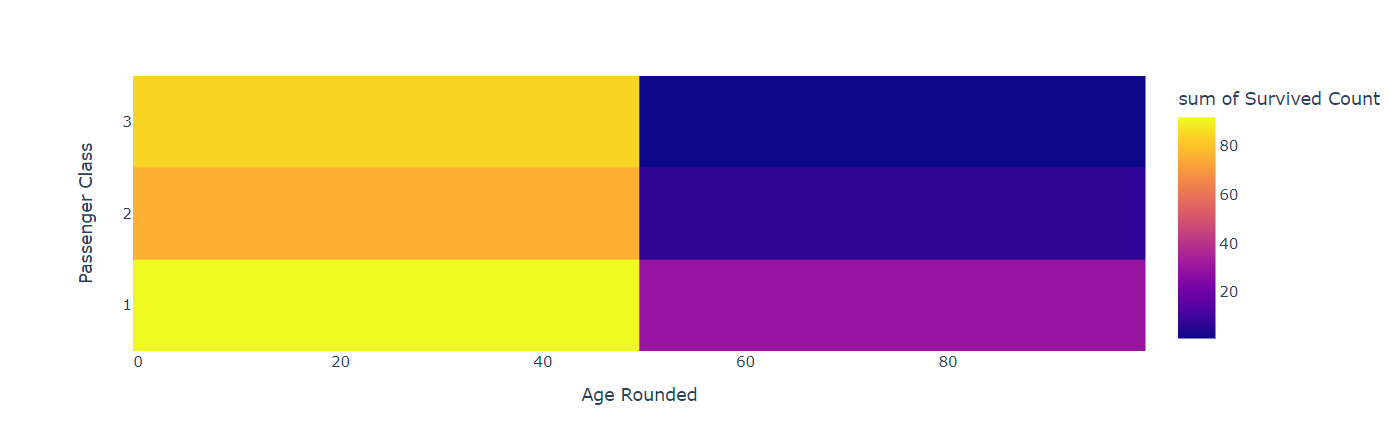
